In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
epochs = 300
nodes_per_layer = [512,128,32]
layers = []
batch_size = 64
dropout_rate = 0.3
num_classes = 10

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
#x_train, x_test = x_train / 255.0, x_test / 255.0
train_mean, train_std = x_train.mean(),x_train.std()
x_train = (x_train - train_mean)/train_std
x_test = (x_test - train_mean)/train_std


In [5]:
layers = []
layers.append(tf.keras.layers.Flatten())
for nodes in nodes_per_layer:
 layers.append(keras.layers.Dense(nodes, activation=tf.nn.relu)) # Using l2 regularization kernel_regularizer=tf.keras.regularizers.l2(l=0.0001)
 layers.append(keras.layers.Dropout(dropout_rate))
layers.append(keras.layers.Softmax())
model = keras.Sequential(layers)

In [6]:
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.01,decay=1e-6)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

In [7]:
history = model.fit(x_train, y_train,epochs=300,batch_size=64,validation_data=(x_test,y_test),use_multiprocessing=True)
model.summary()

Epoch 1/300
782/782 [==============================] - 4s 4ms/step - loss: 2.9627 - sparse_categorical_accuracy: 0.2286 - val_loss: 2.4467 - val_sparse_categorical_accuracy: 0.3711
Epoch 2/300
782/782 [==============================] - 3s 3ms/step - loss: 2.6979 - sparse_categorical_accuracy: 0.2775 - val_loss: 2.2372 - val_sparse_categorical_accuracy: 0.4074
Epoch 3/300
782/782 [==============================] - 3s 3ms/step - loss: 2.6232 - sparse_categorical_accuracy: 0.3021 - val_loss: 2.2271 - val_sparse_categorical_accuracy: 0.4271
Epoch 4/300
782/782 [==============================] - 3s 3ms/step - loss: 2.5662 - sparse_categorical_accuracy: 0.3182 - val_loss: 2.1561 - val_sparse_categorical_accuracy: 0.4546
Epoch 5/300
782/782 [==============================] - 3s 3ms/step - loss: 2.5380 - sparse_categorical_accuracy: 0.3272 - val_loss: 2.1299 - val_sparse_categorical_accuracy: 0.4408
Epoch 6/300
782/782 [==============================] - 2s 3ms/step - loss: 2.5199 - sparse_cate

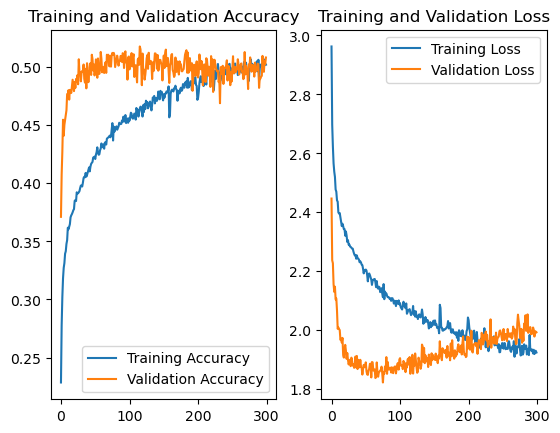

In [8]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 1.9927 - sparse_categorical_accuracy: 0.5081
Test accuracy: 0.5080999732017517
